"""P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems>, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib"""





# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of different algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


# Import all needed Libraries and read the data with pandas

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
sns.set()

In [2]:
# Ensure Reproducibility
np.random.seed(10)

In [3]:
# Read csv
data = pd.read_csv('winequality-red.csv')

## Check out the dataframe

In [4]:
# view the head
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
# describing our data

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
# checking the complete summary of our dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [7]:
# shape of the dataframe
data.shape

(1599, 12)

## Early Preprocessing
- Check the data for abnormalities like missing values, duplicated variables etc.

In [8]:
# Analysising the dataset to see if there are missing variables present

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# checking to see if there are any duplicate features present

data.duplicated().sum()

240

In [10]:
# view the duplicated rows

data[data.duplicated(keep=False)]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
11,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
22,7.9,0.430,0.21,1.6,0.106,10.0,37.0,0.99660,3.17,0.91,9.5,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1567,7.2,0.695,0.13,2.0,0.076,12.0,20.0,0.99546,3.29,0.54,10.1,5
1579,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1581,6.2,0.560,0.09,1.7,0.053,24.0,32.0,0.99402,3.54,0.60,11.3,5
1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6


In [11]:
# dropping duplicated rows

data.drop_duplicates(inplace=True)

In [12]:
# Check the changes been made

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1359 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1359 non-null   float64
 1   volatile acidity      1359 non-null   float64
 2   citric acid           1359 non-null   float64
 3   residual sugar        1359 non-null   float64
 4   chlorides             1359 non-null   float64
 5   free sulfur dioxide   1359 non-null   float64
 6   total sulfur dioxide  1359 non-null   float64
 7   density               1359 non-null   float64
 8   pH                    1359 non-null   float64
 9   sulphates             1359 non-null   float64
 10  alcohol               1359 non-null   float64
 11  quality               1359 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 138.0 KB


## Observations

- All the columns contain numerical variables (floating point numbers and integers)
- There are therefore no categorical columns present
- There are also no missing variables present so we proceed to the next step.
- There are 240 duplicate rows in the dataset, we had to drop them

## Feature Engineering

In [13]:
def status2(x):
    if x < 7:
        return 0
    else:
        return 1
    

data['quality2'] = data['quality'].apply(status2) # splitting the wine into bad and good quality 

# Exploratory Data Analysis

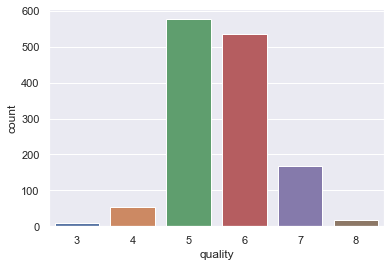

In [14]:
# Our label Distribution (countplot)
sns.countplot(data['quality'])

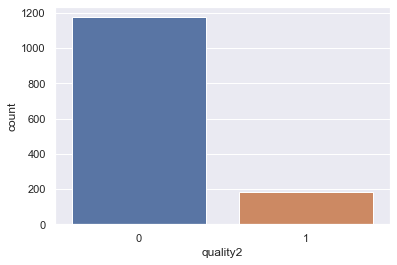

In [15]:
sns.countplot(data['quality2'])

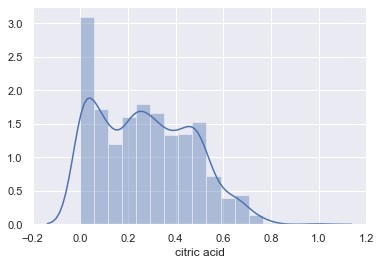

In [16]:
# Example EDA (distplot)
sns.distplot(data['citric acid'])

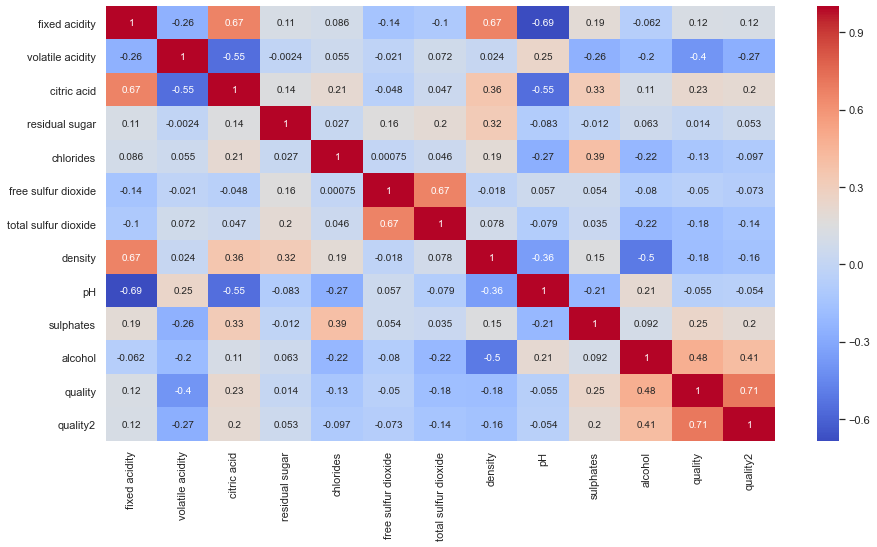

In [17]:
# heatmap of the entire dataset
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=True)

<Figure size 1080x720 with 0 Axes>

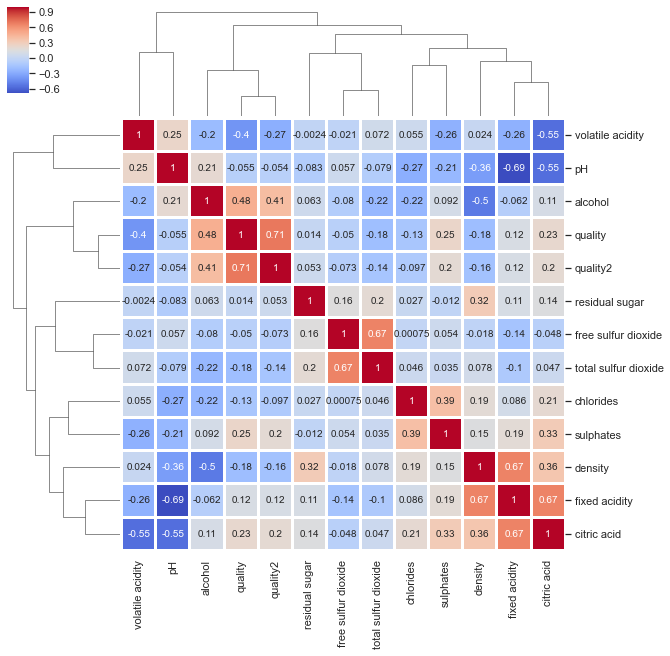

In [18]:
plt.figure(figsize=(15,10))
sns.clustermap(data.corr(), linewidth=2, cmap='coolwarm', annot=True)

In [19]:
# checking the correlation of the columns to quality feature

data.corr()['quality']

fixed acidity           0.119024
volatile acidity       -0.395214
citric acid             0.228057
residual sugar          0.013640
chlorides              -0.130988
free sulfur dioxide    -0.050463
total sulfur dioxide   -0.177855
density                -0.184252
pH                     -0.055245
sulphates               0.248835
alcohol                 0.480343
quality                 1.000000
quality2                0.706168
Name: quality, dtype: float64

In [20]:
# Check the variance of the dataframe

pd.DataFrame({'variance': data.var()}, index=data.columns)

,variance
fixed acidity,3.017134
volatile acidity,0.033500
citric acid,0.038235
residual sugar,1.828752
chlorides,0.002438
free sulfur dioxide,109.145456
total sulfur dioxide,1116.157653
density,0.000003
pH,0.024036
sulphates,0.029127


fixed acidity               AxesSubplot(0.125,0.71587;0.168478x0.16413)
volatile acidity         AxesSubplot(0.327174,0.71587;0.168478x0.16413)
citric acid              AxesSubplot(0.529348,0.71587;0.168478x0.16413)
residual sugar           AxesSubplot(0.731522,0.71587;0.168478x0.16413)
chlorides                  AxesSubplot(0.125,0.518913;0.168478x0.16413)
free sulfur dioxide     AxesSubplot(0.327174,0.518913;0.168478x0.16413)
total sulfur dioxide    AxesSubplot(0.529348,0.518913;0.168478x0.16413)
density                 AxesSubplot(0.731522,0.518913;0.168478x0.16413)
pH                         AxesSubplot(0.125,0.321957;0.168478x0.16413)
sulphates               AxesSubplot(0.327174,0.321957;0.168478x0.16413)
alcohol                 AxesSubplot(0.529348,0.321957;0.168478x0.16413)
quality                 AxesSubplot(0.731522,0.321957;0.168478x0.16413)
quality2                      AxesSubplot(0.125,0.125;0.168478x0.16413)
dtype: object

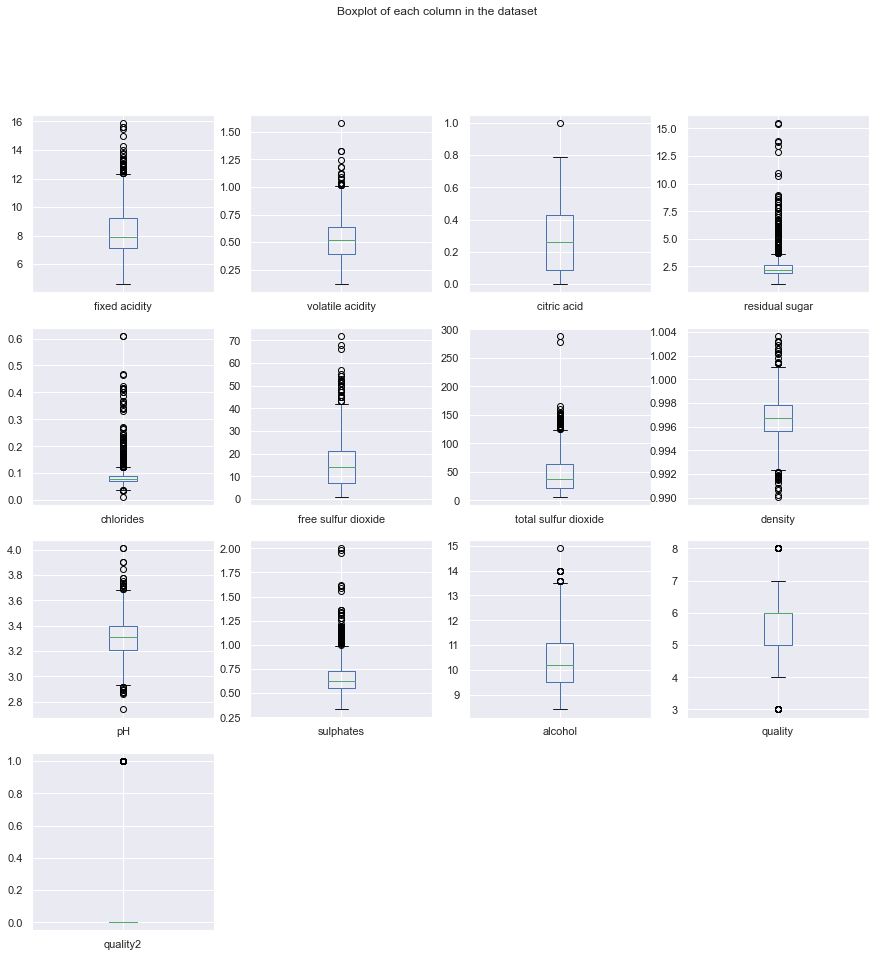

In [21]:
# box plot of the entire dataset to check for outliers

data.plot(kind='box', subplots=True, layout=(4, 4), sharex=False, sharey=False,
          figsize=(15, 15), title='Boxplot of each column in the dataset')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002673C542148>,
      dtype=object)

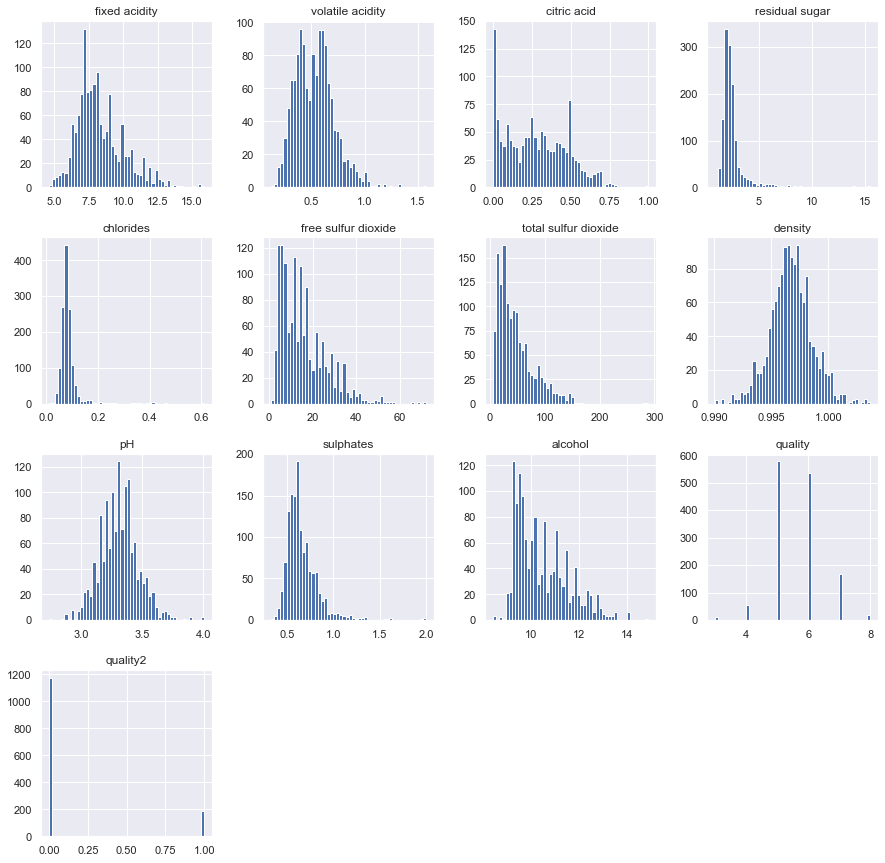

In [22]:
# distplot of the entire dataset to know how to scale each feature

data.hist(bins=50, figsize=(15,15))

# Things i noticed

- The most of the columns contain a lot of outliers
- The heatmap showed that some of the columns exhibited qualities of multicolinearity namely (total and free sulphur dioxide)
- Fixed acidity also showed strong similiarities to both density and citric acid
- Alcohol showed the strongest positive correlation to quality while volatile acidity showed the strongest neagative correlation

#  Data Preprocessing

- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

## For the Pre-processing, 

- Since the the majority of the features have a lot of outliers, scaling might be needed 
- Due to the multi-colinearity present, we need to generate new features and drop some
- total and free sulphur dioxide have very high variance
- No obvious relationship between listed wine properties and their quality value
- Slight inverse relationship with quality: volatile acidity, *Minor: total suplhur dioxide, density.
- Slight direct relationship with quality: alcholol, *Minor: sulphates, citric acid.
- most obvious relationship: alcohol(direct)
- Classes are indeed ordered but unbalanced
- greater than 75 percent of the tested samples had a quality value of 6 or less which is less than 6.5
- No missing or Nan Values
- All the columns contain only numerical data types
- No negative values was present in any column

## Feature Selection and Engineering

In [23]:
# drop useless features

#data['bound sulfur dioxide'] = data['total sulfur dioxide'] - data['free sulfur dioxide']
#data['other acid'] = data['fixed acidity'] - data['citric acid']
#data['new1'] = data['alcohol'] * data['pH']
#data['new2'] = data['alcohol'] * data['density']
#data['new3'] = data['alcohol'] * data['free sulfur dioxide']

# drop some features
#data.drop(['pH', 'citric acid', 'density', 'free sulfur dioxide'], axis=1, inplace=True)

## Feature Extraction - Dimensionality Reduction

Text(0, 0.5, 'Second Principle Component')

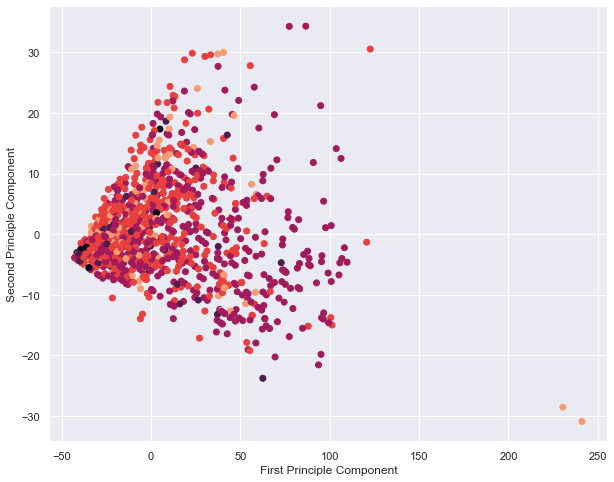

In [24]:
from sklearn.decomposition import PCA

pca = PCA(random_state=10, n_components=2)
x_pca = data.drop(['quality', 'quality2'], axis=1).copy()
x_pca = pca.fit_transform(x_pca)

# visualizing our data

plt.figure(figsize=(10, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=data['quality'])
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')

In [25]:
# determining the best number of components

pca.explained_variance_ratio_

array([0.9481314 , 0.04704536])

## Binning the features

### Using the "pd.cut" Pandas Built-In Function

In [26]:
# You need to be careful to know the range of your features as the data available to you might not not represent the full picture

# data['alcohol'] = pd.cut(df['alcohol'], bins=np.linspace(0, 12, 6))
# data['citric acid'] = pd.cut(data['citric acid'], bins=np.linspace(0, 1, 5))
# data['fixed acidity'] = pd.cut(data['fixed acidity'], bins=np.linspace(0, 16, 6))
# data['chlorides'] = pd.cut(data[chlorides], bins=np.linspace(0, 1, 6))
# data['volatile acidity'] = pd.cut(data['volatile acidity'], bins=np.linspace(0, 2, 6))
# data['total sulfur dioxide'] = pd.cut(data['total sulfur dioxide'], bins=np.linspace(0, 300, 6))

### Using Custom Functions through "apply"

In [27]:
# Binning 5 features

def alcohol(x):
    if x <=9.0:
        return 1.0
    elif x > 9.0 and x <= 10.0:
        return 2.0
    elif x > 10.0 and x <= 11.0:
        return 3.0
    elif x > 11.0 and x <= 12.0:
        return 4.0
    elif x > 12.0 and x <= 13.0:
        return 5.0
    elif x > 13.0:
        return 6.0

def chlorides(x):
    if x <= 0.1:
        return 1.0
    elif x > 0.1 and x <= 0.2:
        return 2
    elif x > 0.2 and x <= 0.3:
        return 3.0
    elif x > 0.3 and x <= 0.4:
        return 4.0
    elif x > 0.4 and x <= 0.5:
        return 5.0
    elif x > 0.5:
        return 6.0
    
def fixed_acidity(x):
    if x <=6.0:
        return 1.0
    elif x > 6.0 and x <= 8.0:
        return 2
    elif x > 8.0 and x <= 10.0:
        return 3.0
    elif x > 10.0 and x <= 12.0:
        return 4.0
    elif x > 12.0 and x <= 14.0:
        return 5.0
    elif x > 14.0:
        return 6.0
    
def total_sulfur_dioxide(x):
    if x <=50.0:
        return 1.0
    elif x > 50.0 and x <= 100.0:
        return 2
    elif x > 100.0 and x <= 150.0:
        return 3.0
    elif x > 150.0 and x <= 200.0:
        return 4.0
    elif x > 200.0 and x <= 250.0:
        return 5.0
    elif x > 250.0:
        return 6.0

def volatile_acidity(x):
    if x <= 0.25:
        return 1.0
    elif x > 0.25 and x <= 0.50:
        return 2
    elif x > 0.50 and x <= 0.75:
        return 3.0
    elif x > 0.75 and x <= 1.0:
        return 4.0
    elif x > 1.0 and x <= 1.25:
        return 5.0
    elif x > 1.25:
        return 6.0

def citric_acid(x):
    if x <=0.2:
        return 1.0
    elif x > 0.2 and x <= 0.4:
        return 2
    elif x > 0.4 and x <= 0.6:
        return 3.0
    elif x > 0.6 and x <= 0.8:
        return 4.0
    elif x > 0.8 :
        return 5.0

#data['alcohol'] = data['alcohol'].apply(alcohol)
#data['citric acid'] = data['citric acid'].apply(citric_acid)
#data['fixed acidity'] = data['fixed acidity'].apply(fixed_acidity)
#data['chlorides'] = data[chlorides].apply(chlorides)
#data['volatile acidity'] = data['volatile acidity'].apply(volatile_acidity)
#data['total sulfur dioxide'] = data['total sulfur dioxide'].apply(total_sulfur_dioxide)
#data['residual sugar'] = data['residual sugar'].apply(residual_sugar)

# Exporting the cleaned dataset into a csv file

In [28]:
data.to_csv('data/cleaned_dataset.csv', index=False)